In [2]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csvs = glob.glob("cmc_n/*.csv")
csvs = sorted(csvs)

df_dict = dict()
df_dict["gallery_size"] = list()
df_dict["test_same_hour"] = list()
df_dict["test_different_day_same_hour"] = list()
df_dict["test_different_day"] = list()
for csv in csvs:
    folder, filename = os.path.split(csv)
    filename, ext = os.path.splitext(filename)
    gallery_size = int(filename)
    df = pd.read_csv(csv)
    tsh, tddsh, tdd = df.iloc[0, :].tolist()
    
    df_dict["gallery_size"].append(gallery_size)
    df_dict["test_same_hour"].append(tsh)
    df_dict["test_different_day_same_hour"].append(tddsh)
    df_dict["test_different_day"].append(tdd)
    
rank1ByGallerySize= pd.DataFrame(df_dict)  

In [4]:
rank1ByGallerySize

,gallery_size,test_same_hour,test_different_day_same_hour,test_different_day
0,10,0.758553,0.651055,0.585793
1,15,0.716789,0.586371,0.531060
2,20,0.678342,0.561392,0.501152
3,25,0.667447,0.551013,0.487972
4,30,0.651500,0.532743,0.460250
5,40,0.609395,0.464599,0.405648
6,50,0.601895,0.445570,0.388966
7,60,0.590789,0.412489,0.359888
8,70,0.565500,0.377342,0.325484


In [5]:
top1OneImagedf = pd.read_csv("top1nidsOneImage.csv")
top1df = pd.read_csv("top1nids.csv")
top1df_ideal = pd.read_csv("top1nids_idela.csv")

In [6]:
top1df

,Unnamed: 0,n,top1
0,0,1,1.000000
1,1,2,0.972266
2,2,3,0.971321
3,3,4,0.959660
4,4,5,0.956823
...,...,...,...
78,78,79,0.757327
79,79,80,0.757012
80,80,81,0.756382
81,81,82,0.756382


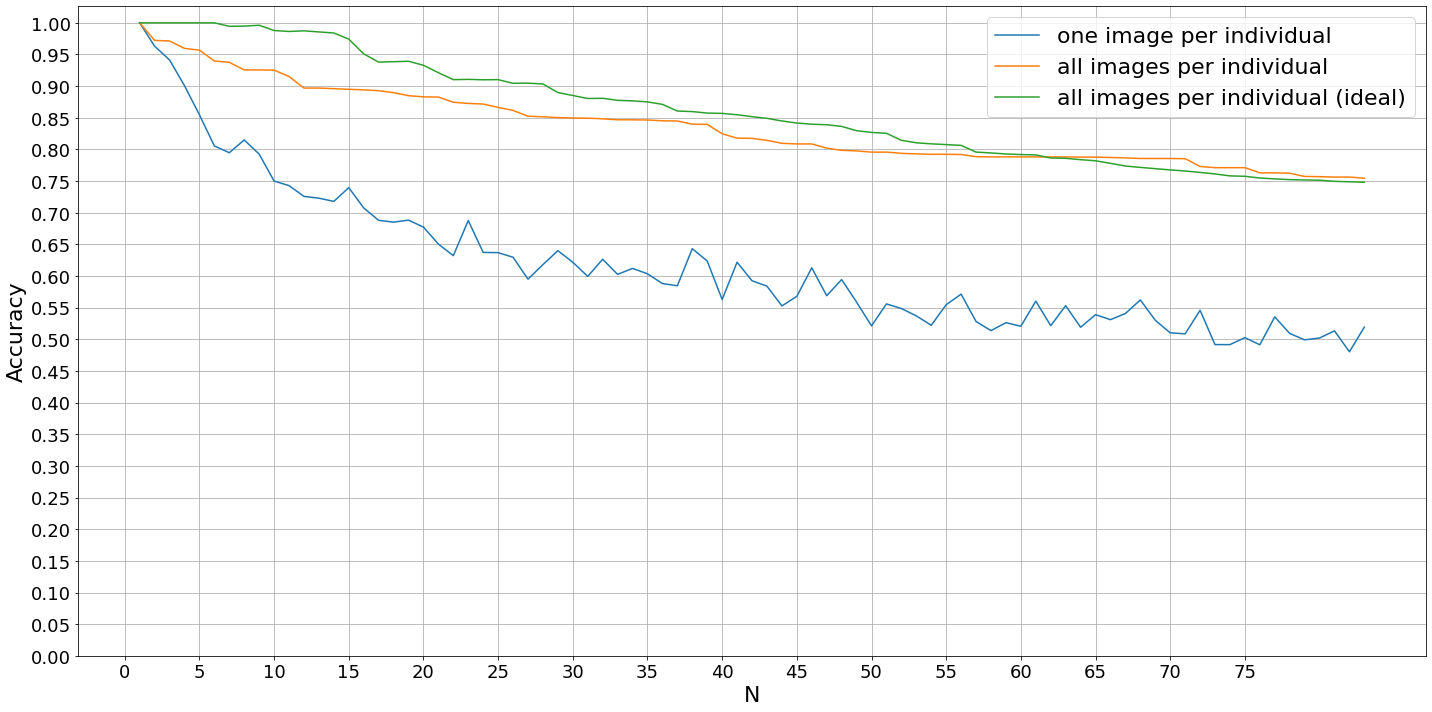

In [9]:
plt.figure(figsize=(20, 10))
ax = plt.gca()
top1OneImagedf.plot(x="n", y="top1", label="one image per individual", ax=ax);
top1df.plot(x="n", y="top1", label="all images per individual", ax=ax);
top1df_ideal.plot(x="n", y="top1", label="all images per individual (ideal)", ax=ax);
yticks = np.arange(0, 1.05, 0.05)
xticks = np.arange(0, 80, 5)
plt.yticks(yticks, fontsize=18);
plt.xticks(xticks, fontsize=18);
plt.ylabel("Accuracy", fontsize=22)
plt.xlabel("N", fontsize=22)
plt.grid();
plt.tight_layout()
plt.legend(fontsize=22)
plt.savefig("cmc_by_n_one_image_vs_multiple_images.png", bbox_inches="tight")

In [10]:
mAPOneImagedf = pd.read_csv("mAPOneImage.csv")
mAPdf = pd.read_csv("mAP_by_n.csv")
mAPdf_ideal = pd.read_csv("mAP_by_n_ideal.csv")

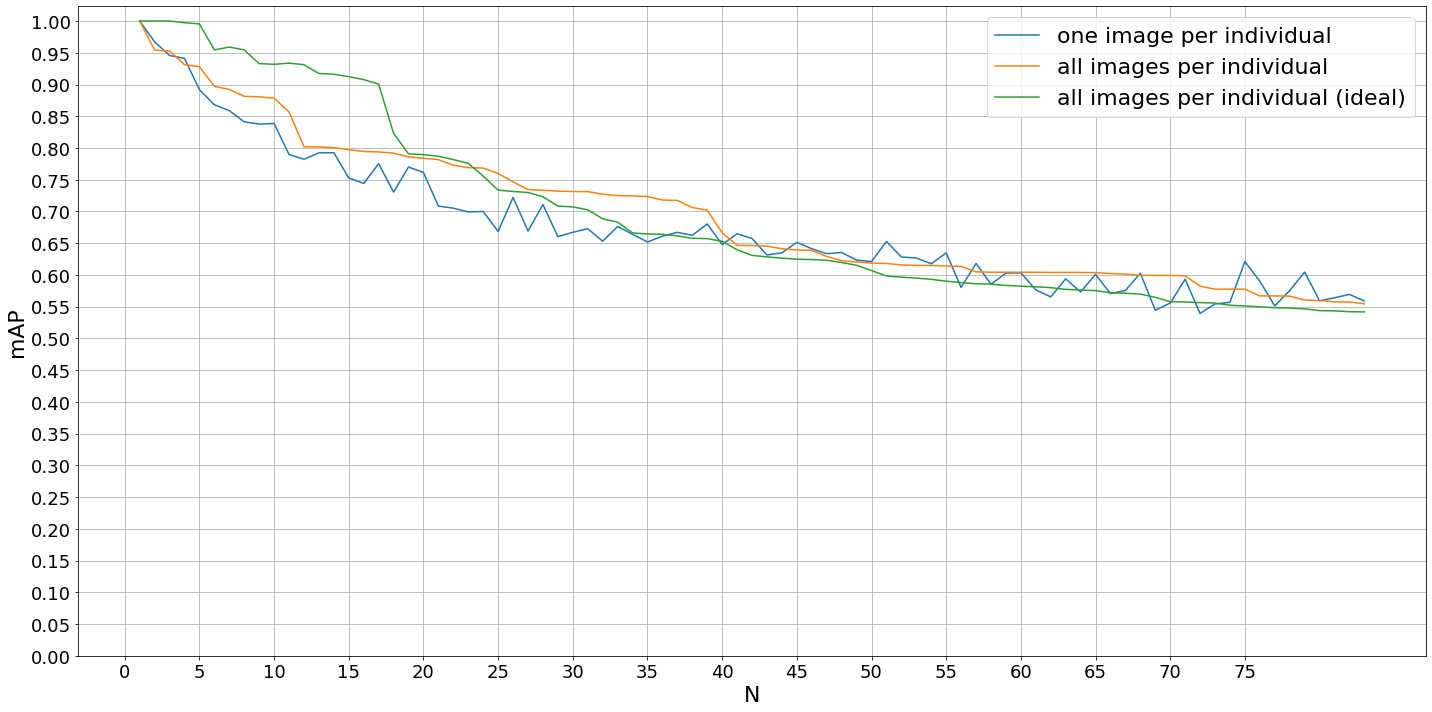

In [11]:
plt.figure(figsize=(20, 10))
ax = plt.gca()
mAPOneImagedf.plot(x="n", y="top1", label="one image per individual", ax=ax);
mAPdf.plot(x="n", y="top1", label="all images per individual", ax=ax);
mAPdf_ideal.plot(x="n", y="top1", label="all images per individual (ideal)", ax=ax);
yticks = np.arange(0, 1.05, 0.05)
xticks = np.arange(0, 80, 5)
plt.yticks(yticks, fontsize=18);
plt.xticks(xticks, fontsize=18);
plt.ylabel("mAP", fontsize=22)
plt.xlabel("N", fontsize=22)
plt.grid();
plt.tight_layout()
plt.legend(fontsize=22)
plt.savefig("mAP_by_n_one_image_vs_multiple_images_vs_ideal.png", bbox_inches="tight")